## Setting up Bed files:

In [422]:
import pandas as pd
import os


In [423]:
coords = pd.read_csv("final_nt_workflow/subset100_bsap_feature_metadata.csv")
# coords = df[['staxid', 'ssciname', 'bsap_coords', 'biob_coords']]
coords = coords[['staxid', 'ssciname', 'bsap_coords', 'biob_coords']]

In [424]:
coords['bsap_strand'] = coords['bsap_coords'].fillna("0").apply(lambda x: "-" if 'complement' in x else '+')
coords['biob_strand'] = coords['biob_coords'].apply(lambda x: "-" if 'complement' in x else '+')

In [425]:
coords[['biob_start', 'biob_end']] = coords['biob_coords'].str.strip("complement()").str.split("\.\.", expand=True).astype(int)
coords[['bsap_start', 'bsap_end']] = coords['bsap_coords'].fillna("0..0").str.strip("complement()").str.split("\.\.", expand=True).astype(int)

In [426]:
coords

,staxid,ssciname,bsap_coords,biob_coords,bsap_strand,biob_strand,biob_start,biob_end,bsap_start,bsap_end
0,1220553.0,Nocardia flavorosea NBRC 108225,212068..212295,211007..212035,+,+,211007,212035,212068,212295
1,1210074.0,Nocardia harenae NBRC 108248,660045..660254,658996..660009,+,+,658996,660009,660045,660254
2,1219029.0,Rhodococcus yunnanensis NBRC 103083,99905..100120,98887..99894,+,+,98887,99894,99905,100120
3,158898.0,Gordonia westfalica,complement(992614..992853),complement(992903..993940),-,-,992903,993940,992614,992853
4,485602.0,Actinophytocola xinjiangensis,complement(17965..18168),complement(18170..19219),-,-,18170,19219,17965,18168
...,...,...,...,...,...,...,...,...,...,...
74,1200352.0,Corynebacterium terpenotabidum Y-11,1011409..1011636,1010406..1011404,+,+,1010406,1011404,1011409,1011636
75,1348662.0,Corynebacterium argentoratense DSM 44202,complement(1292894..1293163),complement(1293183..1294220),-,-,1293183,1294220,1292894,1293163
76,1562887.0,Frankia coriariae,62763..63035,61507..62466,+,+,61507,62466,62763,63035
77,NaN,Mycobacterium tuberculosis H37Rv,1791334..1791573,1790284..1791333,+,+,1790284,1791333,1791334,1791573


In [427]:
(coords['bsap_start'] <= coords['bsap_end']).sum()

79

In [428]:
def get_proximity(row):    
    
    if row['biob_start'] < row['bsap_start']:
        prox = row['bsap_start'] - row['biob_end']
    
    else:
        prox = row['biob_start'] - row['bsap_end']
        
    return prox
    
    

In [429]:
coords[coords.apply(get_proximity, axis=1) > 1000]

,staxid,ssciname,bsap_coords,biob_coords,bsap_strand,biob_strand,biob_start,biob_end,bsap_start,bsap_end
20,1993.0,Actinomadura madurae,complement(291258..291440),complement(286905..287900),-,-,286905,287900,291258,291440
26,2576905.0,Microbispora fusca,45899..46081,complement(49746..50744),+,-,49746,50744,45899,46081
27,2508997.0,Actinomadura soli,complement(683..799),complement(10066..11061),-,-,10066,11061,683,799
31,2604572.0,Actinomadura decatromicini,complement(118932..119147),complement(115636..116631),-,-,115636,116631,118932,119147
49,83302.0,Microbispora corallina,complement(25686..25874),20891..21889,-,+,20891,21889,25686,25874
54,2750812.0,Actinomadura graeca,6816518..6816703,6818372..6819367,+,+,6818372,6819367,6816518,6816703
66,479432.0,Streptosporangium roseum DSM 43021,complement(9178348..9178530),9172426..9173424,-,+,9172426,9173424,9178348,9178530
73,1048339.0,Sporichthya polymorpha DSM 43042,complement(3521040..3521240),complement(3525553..3526584),-,-,3525553,3526584,3521040,3521240
78,NaN,Pseudonocardia sp. MAG106,NaN,4969..6159,+,+,4969,6159,0,0


In [430]:
def get_relative_coords(row):

    if row['bsap_start'] < row['biob_start']:
        bsap_relative_start = row['bsap_start'] - row['bsap_start']
        bsap_relative_end = row['bsap_end'] - row['bsap_start']

        biob_relative_start = row['biob_start'] - row['bsap_start']
        biob_relative_end = row['biob_end'] - row['bsap_start']

    else:
        bsap_relative_start = row['bsap_start'] - row['biob_start']
        bsap_relative_end = row['bsap_end'] - row['biob_start']

        biob_relative_start = row['biob_start'] - row['biob_start']
        biob_relative_end = row['biob_end'] - row['biob_start']

    return (bsap_relative_start, bsap_relative_end, row['bsap_strand']), (biob_relative_start, biob_relative_end, row['biob_strand'])

In [431]:
coords[['bsap_relative_coords', 'biob_relative_coords']] = pd.DataFrame(coords.apply(get_relative_coords, axis=1).tolist())

In [11]:
beda = coords[['staxid', 'ssciname']].merge(pd.DataFrame(coords[['bsap_relative_coords', 'biob_relative_coords']].stack(), columns=['coords']).reset_index().set_index('level_0'),
                                     how='outer', left_index=True, right_index=True).reset_index(drop=True)

In [12]:
beda.columns = ['taxid', 'name', 'gene', 'coords']
beda['gene'] = beda['gene'].str.split("_", expand=True)[0]

In [13]:
beda[['start', 'end', 'strand']] = pd.DataFrame(beda['coords'].tolist())

In [14]:
beda

,taxid,name,gene,coords,start,end,strand
0,1220553.0,Nocardia flavorosea NBRC 108225,bsap,"(1061, 1288, +)",1061,1288,+
1,1220553.0,Nocardia flavorosea NBRC 108225,biob,"(0, 1028, +)",0,1028,+
2,1210074.0,Nocardia harenae NBRC 108248,bsap,"(1049, 1258, +)",1049,1258,+
3,1210074.0,Nocardia harenae NBRC 108248,biob,"(0, 1013, +)",0,1013,+
4,1219029.0,Rhodococcus yunnanensis NBRC 103083,bsap,"(1018, 1233, +)",1018,1233,+
...,...,...,...,...,...,...,...
153,1562887.0,Frankia coriariae,biob,"(0, 959, +)",0,959,+
154,NaN,Mycobacterium tuberculosis H37Rv,bsap,"(1050, 1289, +)",1050,1289,+
155,NaN,Mycobacterium tuberculosis H37Rv,biob,"(0, 1049, +)",0,1049,+
156,NaN,Pseudonocardia sp. MAG106,bsap,"(0, 0, +)",0,0,+


In [17]:
species = pd.read_csv("final_nt_workflow/bsap_nt_subset50_rooted_species_order.txt").columns.str.replace("_", " ").tolist()

In [21]:
pd.Series(species).to_csv("final_nt_workflow/bsap_nt_subset50_rooted_species_order.csv", index=False)

In [145]:
beda = beda[beda['name'].isin(species)].reset_index(drop=True).drop(columns=['coords'])

In [146]:
beda['score'] = beda['gene'].apply(lambda x: 0 if x == 'bsap' else 500)
beda['chr'] = '0'

In [4]:
bed

In [152]:
beda[['name', 'start', 'end', 'gene', 'score', 'strand']].to_csv("final_nt_workflow/subset50_gene_orientation3.bed", index=False, sep="\t")

In [163]:
names = beda['name'].unique().tolist()

In [178]:
beda[beda['name'] == name]

,taxid,name,gene,start,end,strand,score,chr
98,NaN,Pseudonocardia sp. MAG106,bsap,0,0,+,0,0
99,NaN,Pseudonocardia sp. MAG106,biob,4969,6159,+,500,0


In [179]:
for i in range(len(names)):
    name = names[i]
    bed = beda[beda['name'] == name].copy()
    
    bed[['chr', 'start', 'end', 'name', 'score', 'strand']].to_csv("final_nt_workflow/bed_files/org{}.bed".format(str(i)),
                                                                   index=False, header=False, sep="\t")
    

In [182]:
beda[beda['name'].str.contains("William")]

,taxid,name,gene,start,end,strand,score,chr
48,885042.0,Williamsia phyllosphaerae,bsap,1048,1341,+,0,0
49,885042.0,Williamsia phyllosphaerae,biob,0,1043,+,500,0
72,391736.0,Williamsia serinedens,bsap,0,257,-,0,0
73,391736.0,Williamsia serinedens,biob,264,1310,-,500,0


In [180]:
6159 - 4969

1190

In [158]:
beda[['chr', 'start', 'end', 'name', 'score', 'strand']]

,chr,start,end,name,score,strand
0,0,1018,1233,Rhodococcus yunnanensis NBRC 103083,0,+
1,0,0,1007,Rhodococcus yunnanensis NBRC 103083,500,+
2,0,0,203,Actinophytocola xinjiangensis,0,-
3,0,205,1254,Actinophytocola xinjiangensis,500,-
4,0,0,293,Corynebacterium sphenisci DSM 44792,0,-
...,...,...,...,...,...,...
95,0,0,959,Frankia coriariae,500,+
96,0,1050,1289,Mycobacterium tuberculosis H37Rv,0,+
97,0,0,1049,Mycobacterium tuberculosis H37Rv,500,+
98,0,0,0,Pseudonocardia sp. MAG106,0,+


In [150]:
beda['start'].max()

9383

In [151]:
beda['end'].max()

10378

In [ ]:
beda[beda['']]

In [156]:
beda[beda['name'].isin(beda[beda['start'] > 2000]['name'].tolist())]

,taxid,name,gene,start,end,strand,score,chr
22,1993.0,Actinomadura madurae,bsap,4353,4535,-,0,0
23,1993.0,Actinomadura madurae,biob,0,995,-,500,0
30,2576905.0,Microbispora fusca,bsap,0,182,+,0,0
31,2576905.0,Microbispora fusca,biob,3847,4845,-,500,0
32,2508997.0,Actinomadura soli,bsap,0,116,-,0,0
33,2508997.0,Actinomadura soli,biob,9383,10378,-,500,0
56,83302.0,Microbispora corallina,bsap,4795,4983,-,0,0
57,83302.0,Microbispora corallina,biob,0,998,+,500,0
82,479432.0,Streptosporangium roseum DSM 43021,bsap,5922,6104,-,0,0
83,479432.0,Streptosporangium roseum DSM 43021,biob,0,998,+,500,0


In [ ]:

    chrom - The name of the chromosome (e.g. chr3, chrY, chr2_random) or scaffold (e.g. scaffold10671).
    chromStart - The starting position of the feature in the chromosome or scaffold. The first base in a chromosome is numbered 0.
    chromEnd - The ending position of the feature in the chromosome or scaffold. The chromEnd base is not included in the display of the feature, however, the number in position format will be represented. For example, the first 100 bases of chromosome 1 are defined as chrom=1, chromStart=0, chromEnd=100, and span the bases numbered 0-99 in our software (not 0-100), but will represent the position notation chr1:1-100. Read more here.
    name - Defines the name of the BED line. This label is displayed to the left of the BED line in the Genome Browser window when the track is open to full display mode or directly to the left of the item in pack mode.
    score - A score between 0 and 1000. If the track line useScore attribute is set to 1 for this annotation data set, the score value will determine the level of gray in which this feature is displayed (higher numbers = darker gray). This table shows the Genome Browser's translation of BED score values into shades of gray:
    strand

### Write tracks file to call in all 50 bed files

In [171]:
def get_sample_lines(n, name):
    
    sample_lines = [
        "[bed {}]".format(n+1),
        "file = bed_files/org{}.bed".format(n),
        "height = 2",
        "title = {}".format(name),
        "fontsize = 7",
        "file_type = bed",
        "color = Reds",
        "border_color = black",
        "gene_rows = 1"]
    
    return sample_lines


In [172]:
names[:5]

['Rhodococcus yunnanensis NBRC 103083',
 'Actinophytocola xinjiangensis',
 'Corynebacterium sphenisci DSM 44792',
 'Corynebacterium aquilae DSM 44791',
 'Mycolicibacterium iranicum']

In [174]:

def write_track_ini_file(names, track_filename):
    header_lines = [
        "[x-axis]",
        "fontsize = 15",
        "where = top",
        "[spacer]",
        "height = 0.5"]


    ## write lines to track.ini file
    with open(track_filename, 'w') as f:
        for line in header_lines:
            f.write(line)
            f.write("\n")

        for i in range(len(names)):

            name = names[i]
            sample_lines = get_sample_lines(i, name)

            for line in sample_lines:
                f.write(line)
                f.write('\n')

    return

In [175]:
write_track_ini_file(names, "gene_orientation_track3.ini")

## Set up dataframe for gggenes

In [432]:
coords = pd.read_csv("final_nt_workflow/subset100_bsap_feature_metadata.csv")
# # coords = df[['staxid', 'ssciname', 'bsap_coords', 'biob_coords']]
coords = coords[['ssciname', 'bsap_coords', 'biob_coords']]

In [433]:
# tree = "final_nt_workflow/bsap_nt_subset47_consensus_tree.nwk.rooted"
# tree = "final_nt_workflow/bsap_nt_subset42_consensus.nwk.rooted"
tree = "final_nt_workflow/bsap_nt_sequences_subset41_consensus_tree.nwk.rooted"

file = open(tree, 'r')
nwk = file.readline()
file.close()

species_order = pd.Series(nwk.split(",")).str.rstrip("\n"
    ).str.replace("_", " ").str.replace("(", " ").str.replace(")", " ").str.split(":", expand=True)[0].str.strip().tolist()

In [434]:
coords[['ssciname']] = coords[['ssciname']].replace("Pseudonocardia sp. MAG106", "Pseudonocardia sp. MAG106*")
coords = coords.set_index('ssciname').loc[species_order]

In [435]:
gg = coords.stack().reset_index()
gg.columns = ['sciname', 'gene', 'coords']

gg[['start', 'end']] = gg['coords'].fillna("0..0").str.strip("complement()").str.split("\.\.", expand=True).astype(int)

# gg['strand'] = gg['coords'].fillna("0").apply(lambda x: "-" if 'complement' in x else '+')
gg['strand'] = gg['coords'].fillna("0").apply(lambda x: "reverse" if 'complement' in x else 'forward')
gg['orientation'] = gg['coords'].fillna("0").apply(lambda x: 0 if 'complement' in x else 1)


gg = gg.drop(columns=['coords'])

In [436]:
gg['gene'] = gg['gene'].str.split("_", expand=True)[0]

In [437]:
gg.head()

,sciname,gene,start,end,strand,orientation
0,Hoyosella rhizosphaerae,bsap,66301,66636,reverse,0
1,Hoyosella rhizosphaerae,biob,66647,67690,reverse,0
2,Hoyosella lacisalsi,bsap,109098,109427,forward,1
3,Hoyosella lacisalsi,biob,107977,109020,forward,1
4,Williamsia serinedens,bsap,87161,87418,reverse,0


In [438]:
gg.columns = ['molecule', 'gene', 'start', 'end', 'strand', 'orientation']

In [439]:
gg.isna().sum().sum()

0

In [440]:
gg['gene'] = gg['gene'].replace("bsap", "BsaP")
gg['gene'] = gg['gene'].replace("biob", "BioB")

In [441]:
gggene_columns = ['molecule', 'start', 'end', 'strand', 'gene', 'orientation']
gg[gggene_columns].to_csv("gene_orientation/gggenes_gene_annotation_subset41.csv", index=False)

### setting up gggenes datafram with relative coordinates:

In [442]:
def get_relative_coords(row):
    
    # deal with pseudonocardia MAG:
    if row.name == "Pseudonocardia sp. MAG106*":
#         return (1, 1, "forward"), (1, 1191, "forward")
        return (1, 1, "forward"), (-595, 595, "forward")

    
        # get bsap strand:
    if 'complement' in row.bsap_coords:
        bsap_strand = "reverse"
        
    else:
        bsap_strand = "forward"
        
    # get biob strand:
    if 'complement' in row.biob_coords:
        biob_strand = "reverse"
        
    else:
        biob_strand = "forward"
        
    # get coordinates:
    
    bsap_start, bsap_end = [int(i) for i in row.bsap_coords.strip("complement()").split("..")]
    biob_start, biob_end = [int(i) for i in row.biob_coords.strip("complement()").split("..")]
    
    # set all coordinates to center around 0
    if bsap_start < biob_start:

        span = biob_end - bsap_start

        bsap_relative_start = -(span//2)
        biob_relative_end = span//2

        bsap_relative_end = bsap_relative_start + (bsap_end-bsap_start)
        biob_relative_start = biob_relative_end - (biob_end-biob_start)

    else: #(biob_start < bsap_start)

        span = bsap_end - biob_start

        biob_relative_start = -(span//2)
        bsap_relative_end = span//2

        bsap_relative_start = bsap_relative_end - (bsap_end-bsap_start)
        biob_relative_end = biob_relative_start + (biob_end-biob_start)
    
    if span > 2000:
        print(row.name, span)

#     print("{},".format(str(span)))
        
    # edit coordinates with range that's too broad:
    
    return (bsap_relative_start, bsap_relative_end, bsap_strand), (biob_relative_start, biob_relative_end, biob_strand)

    
#     # set all coordinates with the first feature starting at coordinate=1
#     if bsap_coords[0] > biob_coords[0]: # bsap_start > biob_start
        
#         bsap_relative_start = bsap_coords[0] - biob_coords[0] + 1
#         bsap_relative_end = bsap_coords[1] - biob_coords[0] + 1
        
#         biob_relative_start = biob_coords[0] - biob_coords[0] + 1
#         biob_relative_end = biob_coords[1] - biob_coords[0] + 1
        
#     else: # biob_start >= bsap_start
#         bsap_relative_start = bsap_coords[0] - bsap_coords[0] + 1
#         bsap_relative_end = bsap_coords[1] - bsap_coords[0] + 1
        
#         biob_relative_start = biob_coords[0] - bsap_coords[0] + 1
#         biob_relative_end = biob_coords[1] - bsap_coords[0] + 1
        
#     return (bsap_relative_start, bsap_relative_end, bsap_strand), (biob_relative_start, biob_relative_end, biob_strand)



In [443]:
coords[['relative_bsap', 'relative_biob']] = pd.DataFrame(coords.apply(get_relative_coords, axis=1).tolist(), index=coords.index)

gg_rel = coords[['relative_bsap', 'relative_biob']].stack().reset_index()

gg_rel.columns = ['sciname', 'gene', 'coords']
gg_rel['gene'] = gg_rel['gene'].str.split("_", expand=True)[1]
gg_rel['gene'] = gg_rel['gene'].replace("biob", "BioB").replace("bsap", "BsaP")

gg_rel[['start', 'end', 'strand']] = pd.DataFrame(gg_rel['coords'].tolist())
gg_rel['orientation'] = gg_rel['strand'].apply(lambda x: 0 if x == 'reverse' else 1)

gg_rel = gg_rel.drop(columns=['coords'])

In [444]:
gggene_columns = ['molecule', 'gene', 'start', 'end', 'strand', 'orientation']
gg_rel.columns = gggene_columns


In [445]:
gg_rel.head(n=10)

,molecule,gene,start,end,strand,orientation
0,Hoyosella rhizosphaerae,BsaP,-694,-359,reverse,0
1,Hoyosella rhizosphaerae,BioB,-349,694,reverse,0
2,Hoyosella lacisalsi,BsaP,396,725,forward,1
3,Hoyosella lacisalsi,BioB,-725,318,forward,1
4,Williamsia serinedens,BsaP,-655,-398,reverse,0
5,Williamsia serinedens,BioB,-391,655,reverse,0
6,Mycolicibacter terrae,BsaP,-644,-408,reverse,0
7,Mycolicibacter terrae,BioB,-393,644,reverse,0
8,Mycolicibacterium iranicum,BsaP,-635,-387,reverse,0
9,Mycolicibacterium iranicum,BioB,-360,635,reverse,0


In [446]:
abs(gg_rel['start'].min())

725

In [447]:
# gg_rel['start'] = gg_rel['start'] + abs(gg_rel['start'].min()) + 1
# gg_rel['end'] = gg_rel['end'] + abs(gg_rel['start'].min()) + 1

In [448]:
gg_rel = gg_rel.set_index('molecule').loc[species_order].reset_index()

In [449]:
# gg_rel.loc[(gg_rel['molecule'] == "Actinomadura madurae") & (gg_rel['gene'] == 'BsaP'), 'start'] = 543
# gg_rel.loc[(gg_rel['molecule'] == "Actinomadura madurae") & (gg_rel['gene'] == 'BsaP'), 'end'] = 725

# gg_rel.loc[(gg_rel['molecule'] == "Actinomadura madurae") & (gg_rel['gene'] == 'BioB'), 'start'] = -725
# gg_rel.loc[(gg_rel['molecule'] == "Actinomadura madurae") & (gg_rel['gene'] == 'BioB'), 'end'] = 270

In [450]:
gg_rel['order'] = np.arange(len(gg_rel['molecule'].unique()) * 2) // 2


In [451]:
gg_rel[gg_rel['molecule'].str.contains('Pseudo')]

,molecule,gene,start,end,strand,orientation,order
54,Pseudonocardia sp. MAG106*,BsaP,1,1,forward,1,27
55,Pseudonocardia sp. MAG106*,BioB,-595,595,forward,1,27
56,Pseudonocardia kunmingensis,BsaP,-596,-417,reverse,0,28
57,Pseudonocardia kunmingensis,BioB,-405,596,reverse,0,28


In [452]:
gg_rel = gg_rel.drop(gg_rel[ (gg_rel['molecule'] == 'Pseudonocardia sp. MAG106*') & (gg_rel['gene'] == 'BsaP') ].index.item()).reset_index(drop=True)

In [453]:
gg_rel = gg_rel.drop(gg_rel[gg_rel['molecule'] == 'Actinomadura madurae'].index)

In [454]:
gg_rel.to_csv("gene_orientation/gggenes_gene_relative_annotation_subset41.csv", index=False)

In [364]:
gg_rel[~gg_rel['molecule'].str.contains('madurae')]['start'].min()

-725

In [365]:
gg_rel[~gg_rel['molecule'].str.contains('madurae')]['end'].max()

725

In [366]:
gg_rel[gg_rel['molecule'].str.contains('madurae')]

,molecule,gene,start,end,strand,orientation
4,Actinomadura madurae,BsaP,2085,2267,reverse,0
5,Actinomadura madurae,BioB,-2267,-1272,reverse,0


In [367]:
print(-2267 + 1542)
print(-1272 + 1542)

-725
270


In [368]:
print(2085 - 1542)
print(2267 - 1542)

543
725


In [369]:
2267 - 725

1542

In [399]:
coords

,bsap_coords,biob_coords,relative_bsap,relative_biob
ssciname,,,,
Kribbella flavida DSM 17836,complement(6460154..6460345),complement(6460342..6461337),"(-591, -400, reverse)","(-404, 591, reverse)"
Kribbella speibonae,320619..320801,319627..320622,"(405, 587, forward)","(-587, 408, forward)"
Actinomadura madurae,complement(291258..291440),complement(286905..287900),"(2085, 2267, reverse)","(-2267, -1272, reverse)"
Amycolatopsis pithecellobii,complement(8750..8950),complement(8947..9963),"(-606, -406, reverse)","(-410, 606, reverse)"
Actinokineospora baliensis,complement(6700920..6701114),complement(6701319..6702356),"(-718, -524, reverse)","(-319, 718, reverse)"
Actinophytocola xinjiangensis,complement(17965..18168),complement(18170..19219),"(-627, -424, reverse)","(-422, 627, reverse)"
Pseudonocardia kunmingensis,complement(831877..832056),complement(832068..833069),"(-596, -417, reverse)","(-405, 596, reverse)"
Pseudonocardia sp. MAG106*,NaN,4969..6159,"(1, 1, forward)","(-595, 595, forward)"
Umezawaea endophytica,complement(279594..279779),complement(279779..280807),"(-606, -421, reverse)","(-422, 606, reverse)"


In [ ]:
molecule: the genome
gene: the name of the gene
start: the start position of the gene
end: the end position of the gene
strand: the strand of the gene
orientation: the orientation of the gene

## Using DNA Features Viewer

In [3]:
import pandas as pd
import numpy as np
import os

from dna_features_viewer import GraphicFeature, GraphicRecord

In [24]:
df = pd.read_csv("gene_orientation/subset50_gene_orientation.csv")

In [26]:
bed = pd.read_csv("gene_orientation/subset50_gene_orientation.bed", delimiter="\t")

,name,start,end,gene,score,strand
0,Amycolatopsis pithecellobii,0,200,bsap,0,-
1,Amycolatopsis pithecellobii,197,1213,biob,500,-
2,Actinophytocola xinjiangensis,0,203,bsap,0,-
3,Actinophytocola xinjiangensis,205,1254,biob,500,-
4,Actinokineospora baliensis,0,194,bsap,0,-
...,...,...,...,...,...,...
87,Corynebacterium gallinarum,0,1004,biob,500,+
88,Corynebacterium phoceense,0,257,bsap,0,-
89,Corynebacterium phoceense,257,1237,biob,500,-
90,Corynebacterium sphenisci DSM 44792,0,293,bsap,0,-


In [ ]:
sequence = str(h37rv_biob.seq)
record = GraphicRecord(sequence=sequence, features=[
    GraphicFeature(start=5, end=10, strand=0, color='#ffcccc'),
#     GraphicFeature(start=8, end=15, strand=+1, color='#ccccff')
])

ax, _ = record.plot(figure_width=40)
record.plot_sequence(ax)
record.plot_translation(ax, (0, len(sequence)), fontdict={'weight': 'bold'})

# ax.figure.savefig('sequence_and_translation.png', bbox_inches='tight')

In [43]:

# def get_feature_list(bed):
#     features = []

#     color_map = {
#         "biob": "#cffccc",
#         "bsap": "#ccccff"
#     }
    
#     for i in bed.index:
        
#         feat = GraphicFeature(start=bed.loc[i, 'start'],
#                              end=bed.loc[i, 'end'],
#                              strand=bed.loc[i, 'strand'],
#                              color=color_map[bed.loc[i, 'gene']],
#                              label=bed.loc[i, 'name'])
#         features.append(feat)
        
#     return features

# feature_list = get_feature_list(bed)


def get_record_list(df):
    records = []
    
    color_map = {
    "biob": "#cffccc",
    "bsap": "#ccccff"
    }
    
    for i in df.index:
        feature_list = [
            GraphicFeature(start = df.loc[i, 'bsap_Rstart'], 
                           end = df.loc[i, 'bsap_Rend'],
                           strand = df.loc[i, 'bsap_strand'],
                           color = color_map['bsap'],
                           label = df.loc[i, 'ssciname']),
            GraphicFeature(start=df.loc[i, 'bsap_Rstart'], 
                           end=df.loc[i, 'bsap_Rend'],
                           strand=df.loc[i, 'biob_strand'],
                           color=color_map['biob'],
                          label = df.loc[i, 'ssciname'])
        ]
        
        records.append(GraphicRecord(sequence_length=7000, features=feature_list))
        
    return records

        
record_list = get_record_list(df)

In [40]:
df.head()

,ssciname,bsap_strand,bsap_Rstart,bsap_Rend,biob_strand,biob_Rstart,biob_Rend
0,Amycolatopsis pithecellobii,-,0,200,-,197,1213
1,Actinophytocola xinjiangensis,-,0,203,-,205,1254
2,Actinokineospora baliensis,-,0,194,-,399,1436
3,Pseudonocardia sp. MAG106,+,0,0,+,4969,6159
4,Umezawaea endophytica,-,0,185,-,185,1213


/Users/nataliethornton/anaconda3/envs/ete/lib/python3.6/site-packages/dna_features_viewer/GraphicRecord/MatplotlibPlottableMixin.py:438: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, figsize=(figure_width, height))


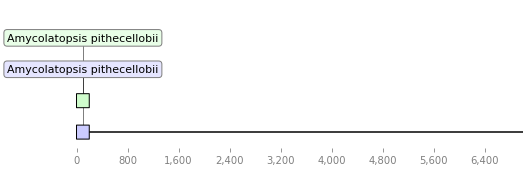

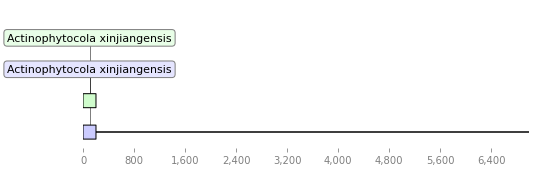

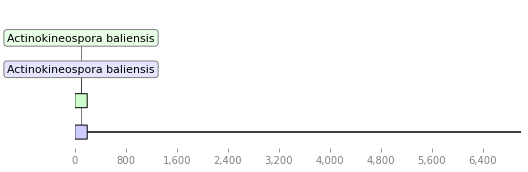

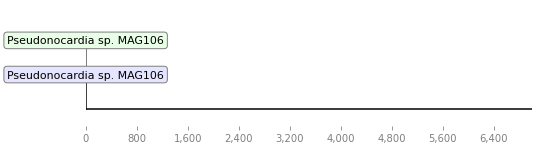

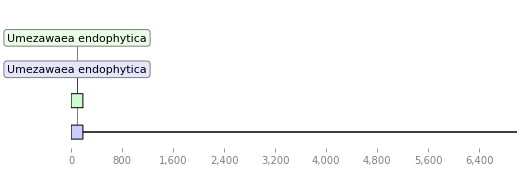

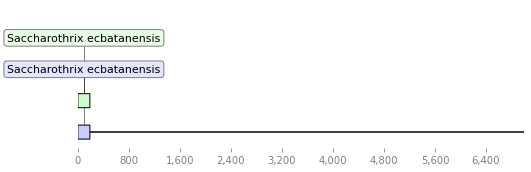

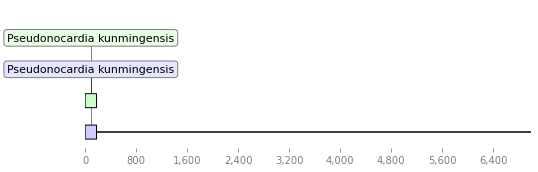

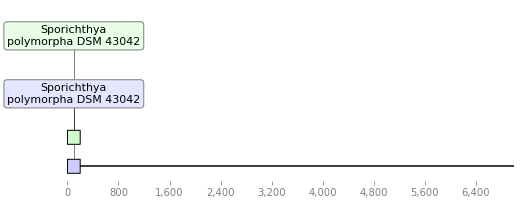

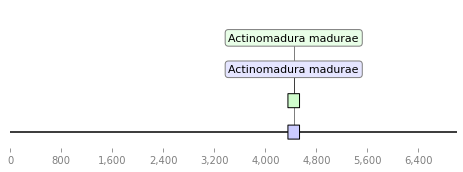

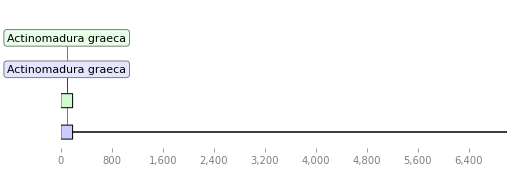

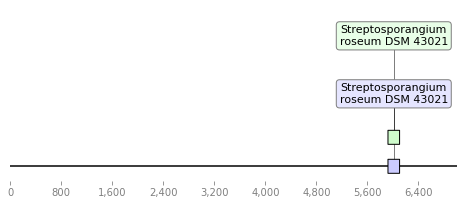

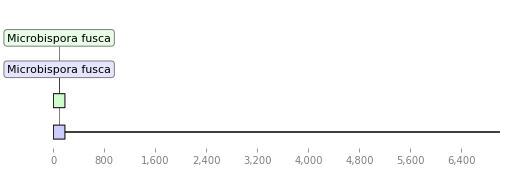

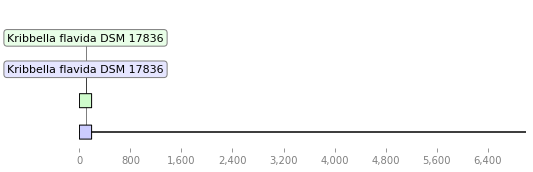

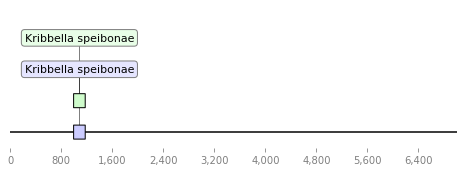

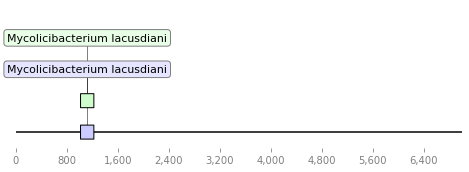

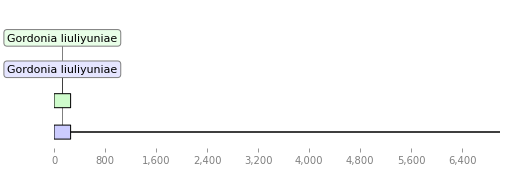

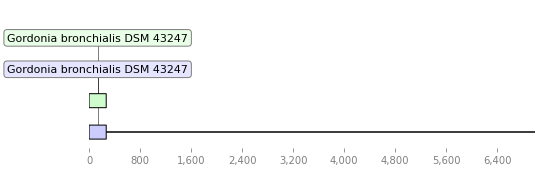

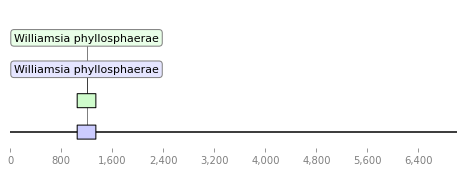

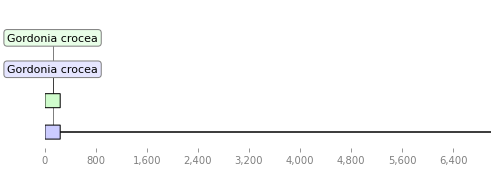

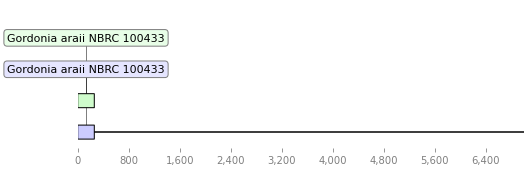

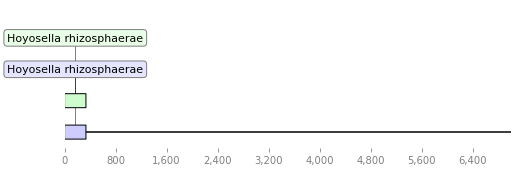

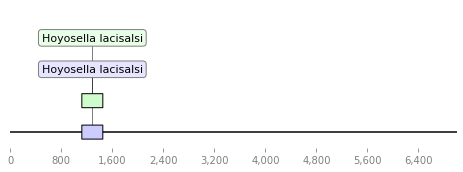

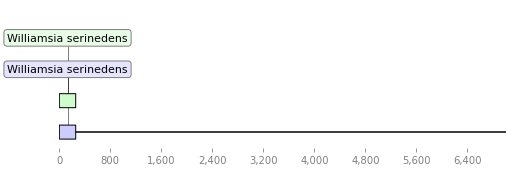

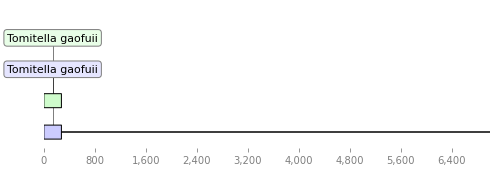

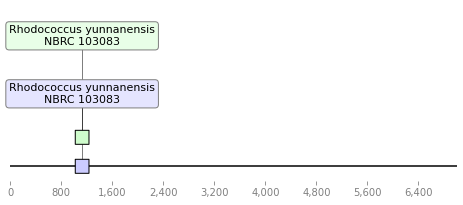

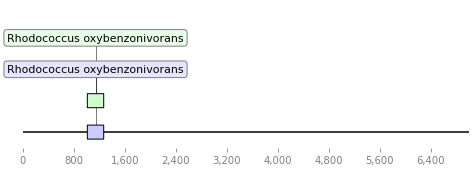

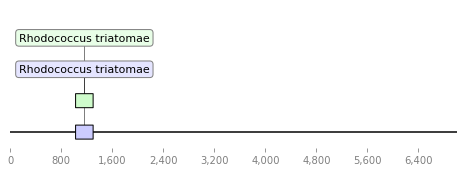

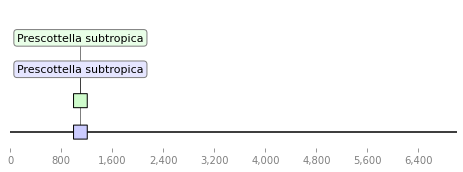

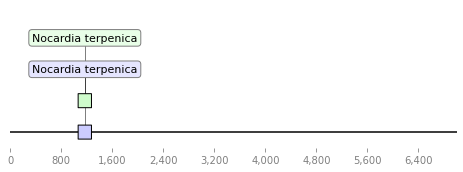

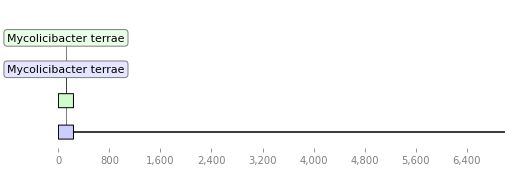

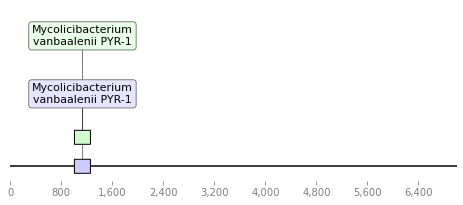

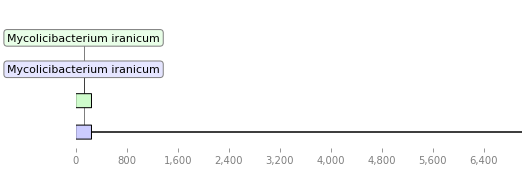

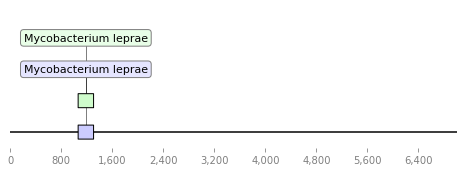

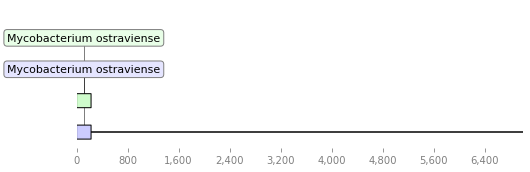

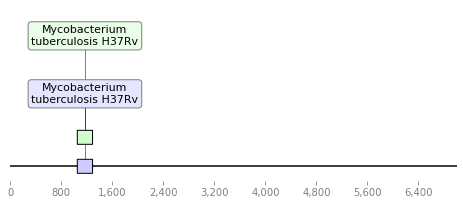

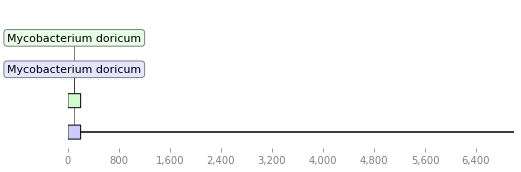

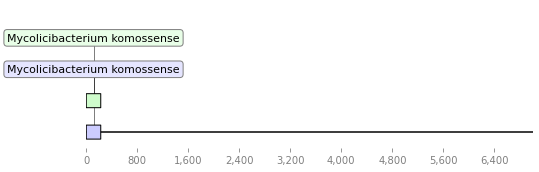

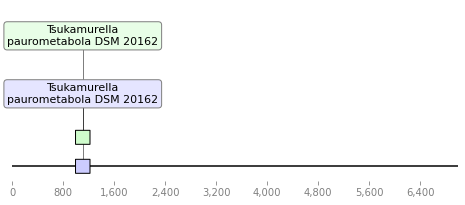

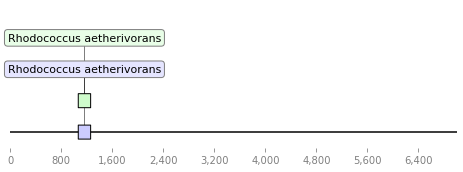

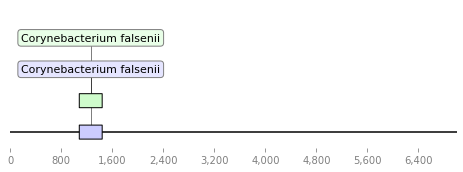

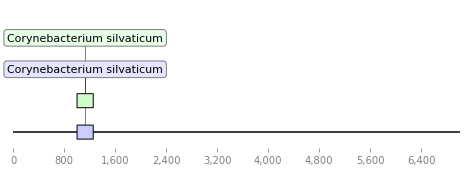

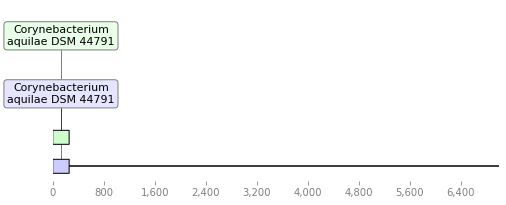

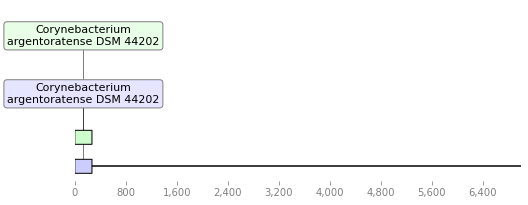

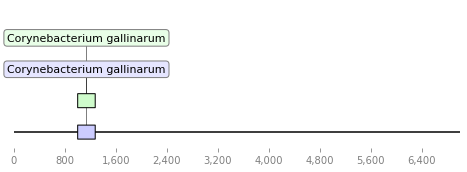

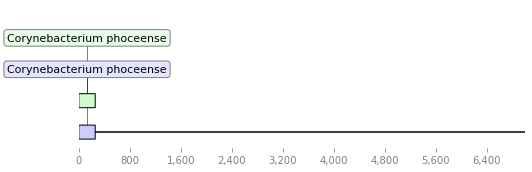

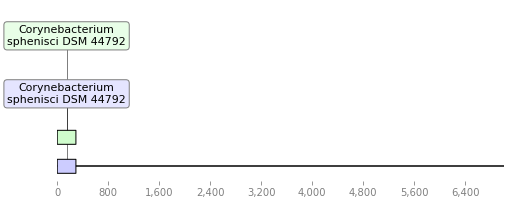

In [45]:

# features=[
#     GraphicFeature(start=0, end=20, strand=+1, color="#ffd700",
#                    label="Small feature"),
#     GraphicFeature(start=20, end=500, strand=+1, color="#ffcccc",
#                    label="Gene 1 with a very long name"),
#     GraphicFeature(start=400, end=700, strand=-1, color="#cffccc",
#                    label="Gene 2"),
#     GraphicFeature(start=600, end=900, strand=+1, color="#ccccff",
#                    label="Gene 3")
# ]

# record = GraphicRecord(sequence_length=7000, features=feature_list)
# record.plot()

for rec in record_list:
    rec.plot()
